In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# project
arrest1_off = pd.read_excel("./data/Noncampusarrest050607.xls")
arrest2_off = pd.read_excel("./data/Noncampusarrest070809.xls")
arrest3_off = pd.read_excel("./data/noncampusarrest101112.xls")
arrest4_off = pd.read_excel("./data/noncampusarrest131415.xls")

arrest1_on = pd.read_excel("./data/Oncampusarrest050607.xls")
arrest2_on = pd.read_excel("./data/Oncampusarrest070809.xls")
arrest3_on = pd.read_excel("./data/oncampusarrest101112.xls")
arrest4_on = pd.read_excel("./data/oncampusarrest131415.xls")

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [10]:
weapons_off = arrest1_off.loc[:, ['Weapon5', 'Weapon6', 'Weapon7']].sum(axis=0).sum()
drug_off = arrest1_off.loc[:, ['Drug5', 'Drug6', 'Drug7']].sum(axis=0).sum()
liq_off = arrest1_off.loc[:, ['Liquor5', 'Liquor6', 'Liquor7']].sum(axis=0).sum()
weapons_off += arrest2_off.loc[:, ['WEAPON8', 'WEAPON8.1']].sum(axis=0).sum()
drug_off += arrest2_off.loc[:, ['DRUG8', 'DRUG8.1']].sum(axis=0).sum()
liq_off += arrest2_off.loc[:, ['LIQUOR8', 'LIQUOR8.1']].sum(axis=0).sum()
weapons_off += arrest3_off.loc[:, ['WEAPON10', 'WEAPON11', 'WEAPON12']].sum(axis=0).sum()
drug_off += arrest3_off.loc[:, ['DRUG10', 'DRUG11', 'DRUG12']].sum(axis=0).sum()
liq_off += arrest3_off.loc[:, ['LIQUOR10', 'LIQUOR11', 'LIQUOR12']].sum(axis=0).sum()
weapons_off += arrest4_off.loc[:, ['WEAPON13', 'WEAPON14', 'WEAPON15']].sum(axis=0).sum()
drug_off += arrest4_off.loc[:, ['DRUG13', 'DRUG14', 'DRUG15']].sum(axis=0).sum()
liq_off += arrest4_off.loc[:, ['LIQUOR13', 'LIQUOR14', 'LIQUOR15']].sum(axis=0).sum()

weapons_on = arrest1_on.loc[:, ['Weapon5', 'Weapon6', 'Weapon7']].sum(axis=0).sum()
drug_on = arrest1_on.loc[:, ['Drug5', 'Drug6', 'Drug7']].sum(axis=0).sum()
liq_on = arrest1_on.loc[:, ['Liquor5', 'Liquor6', 'Liquor7']].sum(axis=0).sum()
weapons_on += arrest2_on.loc[:, ['WEAPON8', 'WEAPON8.1']].sum(axis=0).sum()
drug_on += arrest2_on.loc[:, ['DRUG8', 'DRUG8.1']].sum(axis=0).sum()
liq_on += arrest2_on.loc[:, ['LIQUOR8', 'LIQUOR8.1']].sum(axis=0).sum()
weapons_on += arrest3_on.loc[:, ['WEAPON10', 'WEAPON11', 'WEAPON12']].sum(axis=0).sum()
drug_on += arrest3_on.loc[:, ['DRUG10', 'DRUG11', 'DRUG12']].sum(axis=0).sum()
liq_on += arrest3_on.loc[:, ['LIQUOR10', 'LIQUOR11', 'LIQUOR12']].sum(axis=0).sum()
weapons_on += arrest4_on.loc[:, ['WEAPON13', 'WEAPON14', 'WEAPON15']].sum(axis=0).sum()
drug_on += arrest4_on.loc[:, ['DRUG13', 'DRUG14', 'DRUG15']].sum(axis=0).sum()
liq_on += arrest4_on.loc[:, ['LIQUOR13', 'LIQUOR14', 'LIQUOR15']].sum(axis=0).sum()

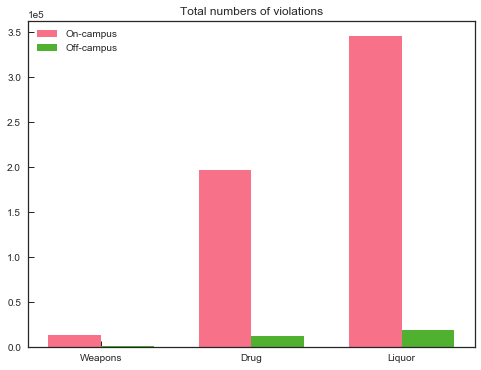

In [11]:
objects = ("Weapons", "Drug", "Liquor")
means_on = (weapons_on, drug_on, liq_on)
means_off = (weapons_off, drug_off, liq_off)

sns.set_style("ticks", {"xtick.direction": "in", "ytick.direction": "in"})
sns.set_palette("husl", 3)

fig, ax = plt.subplots(figsize=(8, 6))
index = np.arange(len(objects))
bar_width = 0.35
ax.bar(index, means_on, bar_width, label="On-campus")
ax.bar(index + bar_width, means_off, bar_width, label="Off-campus")
ax.legend()
plt.title("Total numbers of violations")
plt.xticks(index + bar_width/2, objects)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.savefig("violations_individual.pdf")
plt.show()

In [12]:
violations_off = []
violations_off.append(list(arrest1_off.loc[:, ['Weapon5', 'Drug5', 'Liquir5']].sum(axis=0)))
violations_off.append(list(arrest1_off.loc[:, ['Weapon6', 'Drug6', 'Liquir6']].sum(axis=0)))
violations_off.append(list(arrest1_off.loc[:, ['Weapon7', 'Drug7', 'Liquir7']].sum(axis=0)))
violations_off.append(list(arrest2_off.loc[:, ['WEAPON8', 'DRUG8', 'LIQUOR8']].sum(axis=0)))
violations_off.append(list(arrest2_off.loc[:, ['WEAPON8.1', 'DRUG8.1', 'LIQUOR8.1']].sum(axis=0)))
violations_off.append(list(arrest3_off.loc[:, ['WEAPON10', 'DRUG10', 'LIQUOR10']].sum(axis=0)))
violations_off.append(list(arrest3_off.loc[:, ['WEAPON11', 'DRUG11', 'LIQUOR11']].sum(axis=0)))
violations_off.append(list(arrest3_off.loc[:, ['WEAPON12', 'DRUG12', 'LIQUOR12']].sum(axis=0)))
violations_off.append(list(arrest4_off.loc[:, ['WEAPON13', 'DRUG13', 'LIQUOR13']].sum(axis=0)))
violations_off.append(list(arrest4_off.loc[:, ['WEAPON14', 'DRUG14', 'LIQUOR14']].sum(axis=0)))
violations_off.append(list(arrest4_off.loc[:, ['WEAPON15', 'DRUG15', 'LIQUOR15']].sum(axis=0)))

w_off, d_off, l_off = zip(*violations_off)

violations_on = []
violations_on.append(list(arrest1_on.loc[:, ['Weapon5', 'Drug5', 'Liquir5']].sum(axis=0)))
violations_on.append(list(arrest1_on.loc[:, ['Weapon6', 'Drug6', 'Liquir6']].sum(axis=0)))
violations_on.append(list(arrest1_on.loc[:, ['Weapon7', 'Drug7', 'Liquir7']].sum(axis=0)))
violations_on.append(list(arrest2_on.loc[:, ['WEAPON8', 'DRUG8', 'LIQUOR8']].sum(axis=0)))
violations_on.append(list(arrest2_on.loc[:, ['WEAPON8.1', 'DRUG8.1', 'LIQUOR8.1']].sum(axis=0)))
violations_on.append(list(arrest3_on.loc[:, ['WEAPON10', 'DRUG10', 'LIQUOR10']].sum(axis=0)))
violations_on.append(list(arrest3_on.loc[:, ['WEAPON11', 'DRUG11', 'LIQUOR11']].sum(axis=0)))
violations_on.append(list(arrest3_on.loc[:, ['WEAPON12', 'DRUG12', 'LIQUOR12']].sum(axis=0)))
violations_on.append(list(arrest4_on.loc[:, ['WEAPON13', 'DRUG13', 'LIQUOR13']].sum(axis=0)))
violations_on.append(list(arrest4_on.loc[:, ['WEAPON14', 'DRUG14', 'LIQUOR14']].sum(axis=0)))
violations_on.append(list(arrest4_on.loc[:, ['WEAPON15', 'DRUG15', 'LIQUOR15']].sum(axis=0)))

w_on, d_on, l_on = zip(*violations_on)

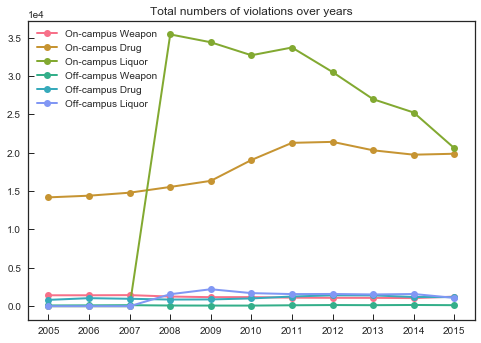

In [13]:
sns.set_palette("husl", 7)
fig, ax = plt.subplots()
index = np.arange(11)
years = [str(year) for year in np.arange(2005, 2016)]
for violation, name in zip(zip(*violations_on), ["Weapon", "Drug", "Liquor"]):
    ax.plot(index, violation, lw=2, marker="o", label="On-campus {}".format(name))
for violation, name in zip(zip(*violations_off), ["Weapon", "Drug", "Liquor"]):
    ax.plot(index, violation, lw=2, marker="o", label="Off-campus {}".format(name))
plt.legend()
plt.title("Total numbers of violations over years")
plt.xticks(index, years)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.savefig("violations_years.pdf")
plt.show()